TP2 - Matplotlib - Josué BAQUERO

On importe les bibliothèques nécessaires:

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Exercice 1: Marche aléatoire 1D

On utilise les fonctions du TP1 pour générer les données, et on ajoute la visualisation avec matplotlib.

In [2]:
def random_walk_1d(N, p, M):
    """Simule une marche aléatoire 1D
    
    Paramètres:
    N: nombre de pas par marche
    p: probabilité d'aller vers le haut. (1-p) -> vers le bas
    M: nombre de marches à simuler

    Exemple d'output pour N= 4 et M=3 
    positions = [
    [0, -1,  0,  1,  2],  # Marche 1
    [0,  1,  0,  1,  0],  # Marche 2
    [0, -1, -2, -1,  0]   # Marche 3
    ]

    """
    # On crée une matrice M x (N+1) pour inclure la position initiale
    positions = np.zeros((M, N+1))  # Commence avec des zéros

    # matrice M x N des probas
    steps = np.random.random((M, N)) < p

    # Comparaison avec p et conversion
    steps = np.where(steps, 1, -1)

    # M tableaux chacun contenant les sommes cummulées 
    # le long des lignes
    positions[:, 1:] = np.cumsum(steps, axis=1)
    
    return positions

Fonction pour afficher une seule marche:

In [3]:
def plot_single_walk(N, p):
    """Affiche une seule marche aléatoire
    N: nombre de pas
    p: probabilité d'aller vers le haut
    """
    positions = random_walk_1d(N, p, M=1)[0]  # Une seule marche
    
    plt.figure(figsize=(12, 5))
    plt.subplot(121)
    plt.plot(range(N+1), positions, 'b-', label='Position')
    plt.title(f'Marche aléatoire 1D\np={p}, N={N} pas')
    plt.xlabel('Nombre de pas')
    plt.ylabel('Position')
    plt.grid(True)
    plt.legend()

Fonction pour afficher les statistiques:

In [4]:
def plot_statistics(N, p, M):
    """Affiche les statistiques de plusieurs marches
    N: nombre de pas
    p: probabilité d'aller vers le haut
    M: nombre de marches
    """
    positions = random_walk_1d(N, p, M)
    
    # Calcul des statistiques
    mean_pos = np.mean(positions, axis=0) # verticalement
    std_pos = np.std(positions, axis=0)
    
    # Valeurs théoriques en fonction de N
    steps = np.arange(N+1) # [0, 1, 2, ..., N]
    theoretical_mean = (2*p - 1) * steps
    theoretical_std = np.sqrt(4 * p * (1-p) * steps)
    
    plt.subplot(122)
    plt.plot(steps, mean_pos, 'b-', label='Moyenne empirique')
    plt.plot(steps, theoretical_mean, 'r--', label='Moyenne théorique')
    plt.fill_between(steps, 
                    mean_pos - std_pos, 
                    mean_pos + std_pos, 
                    alpha=0.2, 
                    color='blue', 
                    label='±1 écart-type')
    plt.plot(steps, theoretical_mean + theoretical_std, 'r:', alpha=0.5)
    plt.plot(steps, theoretical_mean - theoretical_std, 'r:', alpha=0.5)
    plt.title(f'Statistiques sur {M} marches\np={p}, N={N} pas')
    plt.xlabel('Nombre de pas')
    plt.ylabel('Position')
    plt.grid(True)
    plt.legend()

On définit les paramètres et on lance la simulation:

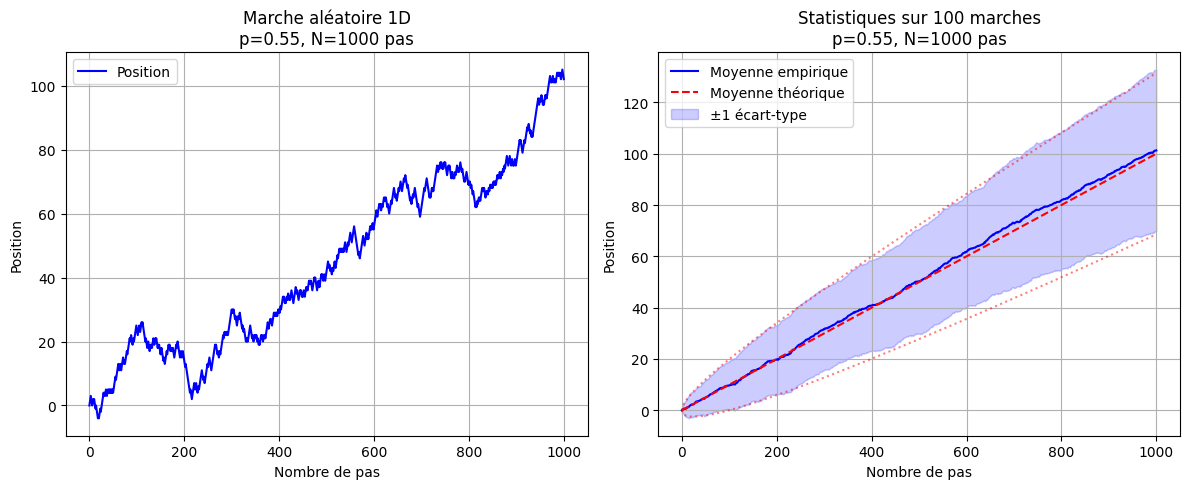

In [5]:
N = 1000  # nombre de pas
p = 0.55  # probabilité d'aller vers le haut
M = 100   # nombre de marches

plot_single_walk(N, p)
plot_statistics(N, p, M)
plt.tight_layout()

## Exercice 2: Marche aléatoire 2D

In [6]:
def random_walk_2d(N):
    """Simule une marche aléatoire 2D avec déplacements perpendiculaires aux axes
    
    Axes: x vers la droite et y vers le haut

    Paramètres:
    N: nombre de pas
    """
    # Générer des directions aléatoires (0: droite, 1: haut, 2: gauche, 3: bas)
    directions = np.random.randint(0, 4, N)
    
    # Initialiser les positions
    x = np.zeros(N + 1)
    y = np.zeros(N + 1)
    
    # Calculer les positions
    for i, direction in enumerate(directions):
        if direction == 0:    # droite
            x[i + 1] = x[i] + 1
            y[i + 1] = y[i]
        elif direction == 1:  # haut
            x[i + 1] = x[i]
            y[i + 1] = y[i] + 1
        elif direction == 2:  # gauche
            x[i + 1] = x[i] - 1
            y[i + 1] = y[i]
        else:                 # bas
            x[i + 1] = x[i]
            y[i + 1] = y[i] - 1
            
    return x, y

Fonction pour afficher la marche 2D:

In [7]:
def plot_2d_walk(N):
    """Affiche la marche aléatoire 2D"""
    x, y = random_walk_2d(N)
    
    plt.figure(figsize=(10, 10))
    plt.plot(x, y, 'b-', alpha=0.7, label='Chemin')
    plt.plot(x[0], y[0], 'go', label='Départ')
    plt.plot(x[-1], y[-1], 'ro', label='Arrivée')
    
    plt.title(f'Marche aléatoire 2D\n{N} pas')
    plt.xlabel('Position X')
    plt.ylabel('Position Y')
    plt.grid(True)
    plt.legend()
    plt.axis('equal')

On simule une marche aléatoire 2D:

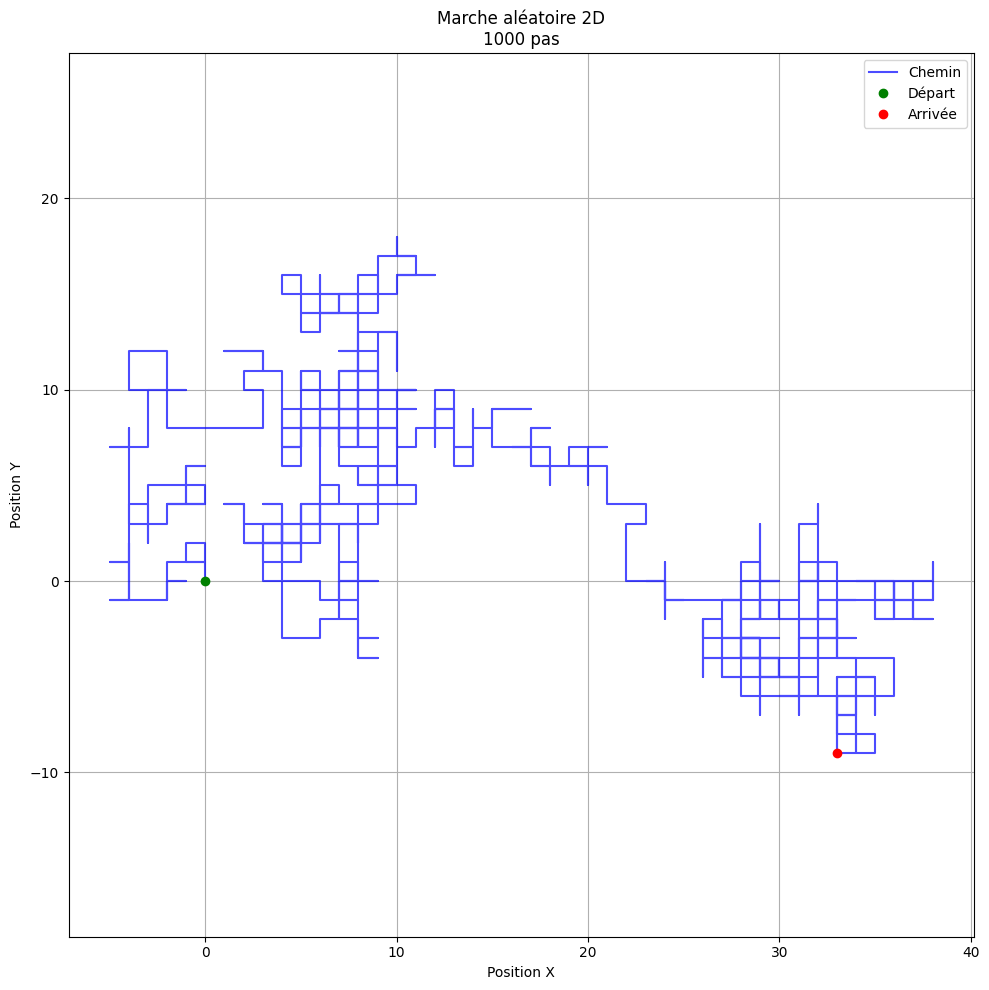

In [8]:
N = 1000  # nombre de pas
plot_2d_walk(N)
plt.tight_layout()

## Exercice 3: Fourmi de Langton

On crée une classe avec une fontion d'initialisation du plateau et une méthode qui va effectuer les déplacements de la fourmi:

In [9]:
class LangtonAnt:
    def __init__(self, size):
        # Initialiser la grille (0: blanc, 1: noir)
        self.grid = np.zeros((size, size))
        # Position initiale de la fourmi (centre)
        self.pos = np.array([size//2, size//2])
        # Direction initiale (0: haut, 1: droite, 2: bas, 3: gauche)
        self.direction = 0
        self.size = size
        
    def step(self):
        """Méthode qui effectue un pas de la simulation"""
        # Rotation selon la couleur de la case
        if self.grid[self.pos[0], self.pos[1]] == 0:  # Case blanche
            self.direction = (self.direction - 1) % 4  # Rotation gauche
        else:  # Case noire
            self.direction = (self.direction + 1) % 4  # Rotation droite
            
        # Inverser la couleur de la case
        self.grid[self.pos[0], self.pos[1]] = 1 - self.grid[self.pos[0], self.pos[1]]
        
        # Déplacement. Repère (x,y) tel que x pointe vers le bas et y vers la droite
        if self.direction == 0:    # haut
            self.pos[0] -= 1
        elif self.direction == 1:  # droite
            self.pos[1] += 1
        elif self.direction == 2:  # bas
            self.pos[0] += 1
        else:                      # gauche
            self.pos[1] -= 1
            
        # Gestion des bords (arrêt si la fourmi sort)
        if (self.pos < 0).any() or (self.pos >= self.size).any():
            return False
        return True

Fonction pour simuler et afficher la fourmi:

In [10]:
def simulate_langton(steps, size=100):
    """Simule la fourmi de Langton"""
    ant = LangtonAnt(size)
    plt.figure(figsize=(10, 10))
    
    # Simulation
    for _ in range(steps):
        if not ant.step():
            print(f"La fourmi est sortie après {_} pas")
            break
    
    # Affichage final
    plt.imshow(ant.grid, cmap='binary')
    plt.title(f'Fourmi de Langton après {steps} pas')
    plt.axis('equal')
    plt.grid(True)
    plt.colorbar(label='Couleur (0: blanc, 1: noir)')

On simule la fourmi de Langton:

La fourmi est sortie après 11654 pas


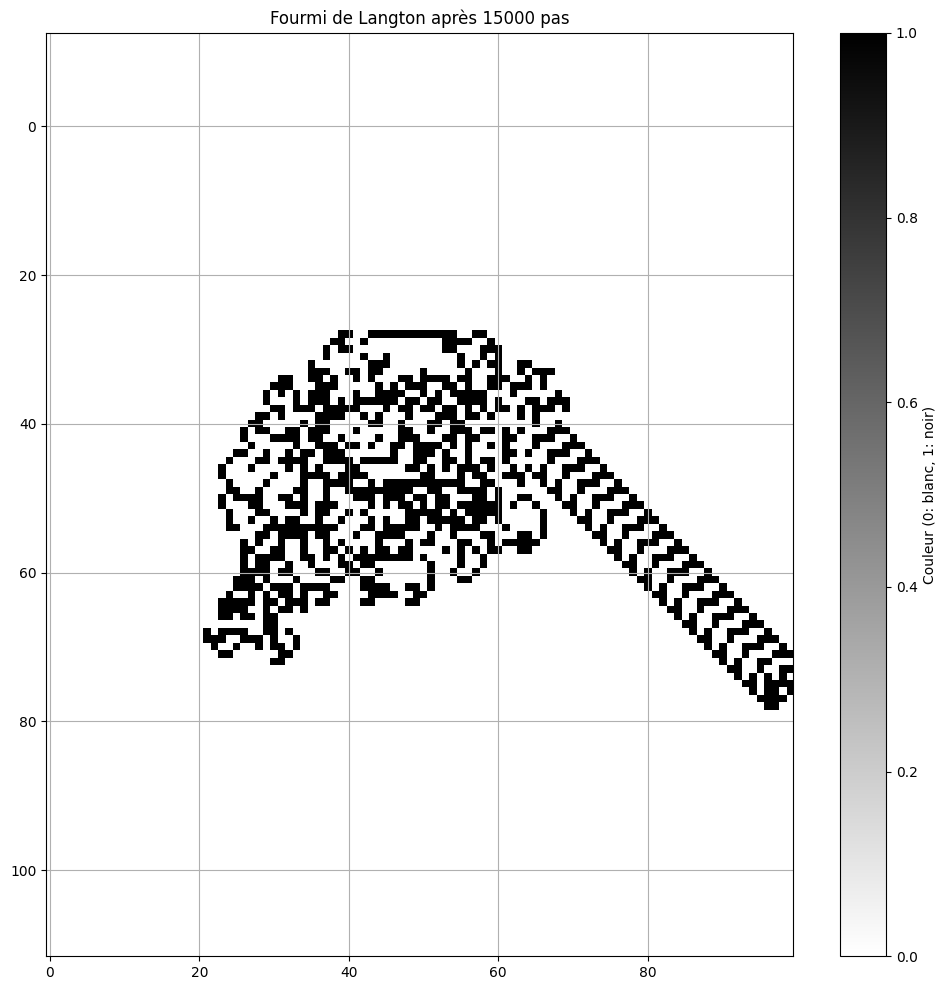

In [11]:
steps = 15000
size = 100
simulate_langton(steps, size)
plt.tight_layout()

Après une période initiale apparemment chaotique, la fourmi finit par construire une « route »

https://fr.wikipedia.org/wiki/Fourmi_de_Langton